##1. Lista de librerias

In [241]:
pip install unidecode

In [242]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import random
import warnings
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import check_array
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

random.seed(13)

In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2 Funciones

In [244]:
%run '/content/drive/MyDrive/Colab Notebooks/Tesis_Functions.ipynb'

balancear_datos Loaded
Selectkbest_features Loaded
rfe_features Loaded
Integración de Variables Loaded
evaluacion de los modelos Loaded
Pca_components Loaded
Improtancia con XGBoost y Random forest Loaded
XG_BOOST Regression Loaded
Random Forest Loaded
quitar_tildes Loaded
completar_datos_serie_tiempo Loaded
eliminar_filas_nan Loaded
cambiar_numeros_menores Loaded
normalize_variables Loaded
calcular_crecimiento_ingresos Loaded
obtener_variables_correlacionadas Loaded
generar_componentes_principales Loaded
rfe_with_elasticnet Loaded
calcular_crecimiento_promedio_por_categoria_Predial Loaded
categorizar_por_boxplot Loaded
calcular_crecimiento_promedio_por_categoria Loaded
limitar_atipicos Loaded
crear_dummies Loaded


##3 Generacion de variables relevantes

###3.1. Carga de datos

In [245]:
#Carga de la Base 0
Base_0 = pd.read_csv('/content/drive/My Drive/4_Proyect_Final/1_Datos/df_unido_Normalizada_sin_corr.csv')


<ipython-input-246-f0ff08437131>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


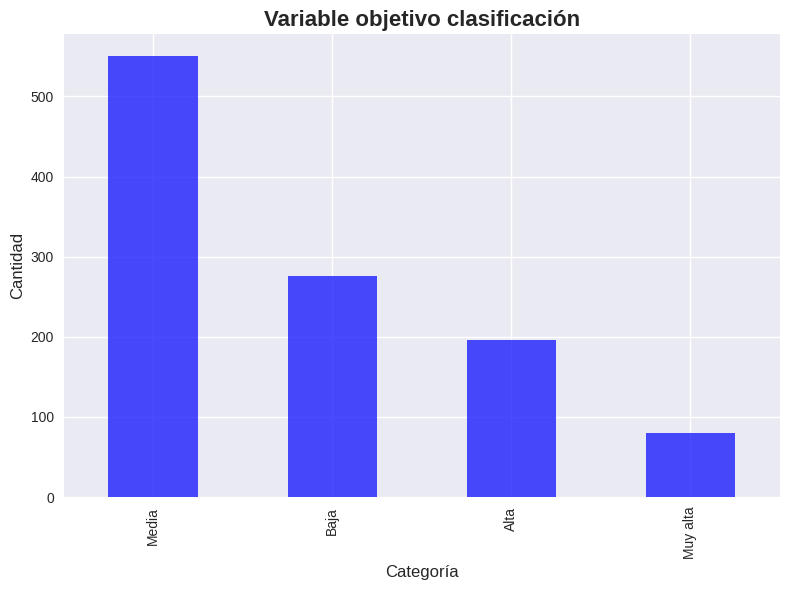

In [246]:
# Distribución de la Variable Obejtivo

# Contar la cantidad de cada categoría en la columna "categoria"
conteo_categorias = Base_0['recomendacion'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
# Generar el gráfico de barras
conteo_categorias.plot(kind='bar', color='blue', alpha=0.7)
# Configurar el título y etiquetas del gráfico
plt.title('Variable objetivo clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [247]:
#Convertir varable objetivo en numerica
# Instanciar el LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable objetivo 'Clase' de palabras a números
Base_0['Y_Objetivo'] = label_encoder.fit_transform(Base_0['recomendacion'])

In [248]:
Base_0.head()

,Id_Municipio_Dane,Nombre_Municipio,Id_Departamento_Dane,Nombre_Departamento,Predial,recomendacion,IPS_Nivel_2,IPS_Departamental,IPS_Indigena,IPS_Mixta,...,Componente_Principal_1403,Componente_Principal_1404,Componente_Principal_1443,Componente_Principal_1445,Componente_Principal_1479,Componente_Principal_1481,Componente_Principal_1490,Componente_Principal_1502,Componente_Principal_1513,Y_Objetivo
0,5001,Medellin,5,Antioquia,133.859306,Media,0.5,0.75,0.0,0.5,...,-0.013677,-0.340777,-0.036625,-0.001411,-0.002973,-0.001972,-0.001091,-0.002191,-0.002079,2
1,5002,Abejorral,5,Antioquia,104.386980,Media,0.0,0.00,0.0,0.0,...,-0.002511,-0.001598,-0.048800,0.382492,-0.002973,-0.001972,-0.001091,-0.002191,-0.003501,2
2,5004,Abriaqui,5,Antioquia,92.937014,Media,0.0,0.00,0.0,0.0,...,-0.002511,-0.001598,-0.015606,-0.028346,-0.002973,-0.001972,-0.001091,-0.002191,-0.003046,2
3,5021,Alejandria,5,Antioquia,212.680226,Media,0.0,0.00,0.0,0.0,...,-0.002511,-0.001598,-0.015606,-0.028346,-0.002973,-0.001972,-0.001091,-0.002191,-0.002477,2
4,5030,Amaga,5,Antioquia,192.535616,Media,0.0,0.00,0.0,0.0,...,-0.002511,-0.001598,-0.035495,0.274285,-0.002973,-0.001972,-0.001091,-0.002191,-0.001670,2


###3.2. Selección de Variables con Selectkbest

In [289]:
columnas_a_eliminar = ['Id_Municipio_Dane','Nombre_Municipio','Id_Departamento_Dane','Nombre_Departamento','Predial','recomendacion','Y_Objetivo']
Base_0_X=Base_0.drop(columnas_a_eliminar, axis=1)
Base_0_Y=pd.DataFrame(Base_0['Y_Objetivo'])
y=np.ravel(Base_0_Y.values)
Id_Municipio_Dane=Base_0[['Id_Municipio_Dane','recomendacion','Y_Objetivo']]

In [250]:
Varaibles_Selectkbest=Selectkbest_features(Base_0_X, y, Base_0_X.shape[1],f_classif)

#Calcular la suma total de la columna
suma_total = Varaibles_Selectkbest['Puntuacion'].sum()

# Normalizar los valores para que sumen 100%
Varaibles_Selectkbest['Importance_Selectkbest'] = (Varaibles_Selectkbest['Puntuacion'] / suma_total)

In [251]:
Varaibles_Selectkbest.head()

,Variable,Puntuacion,Importance_Selectkbest
0,IPS_Nivel_2,0.917706,0.000690
1,IPS_Departamental,0.826750,0.000621
2,IPS_Indigena,3.361067,0.002526
3,IPS_Mixta,0.173920,0.000131
4,Agricultura_Acelga,0.000000,0.000000


###3.4. Selección de Variables RFE

In [252]:
varibales_rfe=select_features_with_rfe_Clasisification(Base_0_X, y, Base_0_X.shape[1])
varibales_rfe['Importance'] = varibales_rfe['Importance'].abs()
#Calcular la suma total de la columna
suma_total = varibales_rfe['Importance'].sum()
# Normalizar los valores para que sumen 100%
varibales_rfe['Importance_ElasticNet'] = (varibales_rfe['Importance'] / suma_total)

In [253]:
varibales_rfe.head()

,Variable,Importance,Importance_ElasticNet
0,IPS_Nivel_2,0.138983,0.000663
1,IPS_Departamental,0.225316,0.001075
2,IPS_Indigena,0.206256,0.000984
3,IPS_Mixta,0.006761,0.000032
4,Agricultura_Acelga,0.000000,0.000000


###3.5. Selección de Variables XGBoost

In [254]:
varibales_rfe_XGBOOST=find_important_variables_Clasificacion(Base_0_X, Base_0_Y, 'xgboost', n_estimators=100)
varibales_rfe_XGBOOST = varibales_rfe_XGBOOST.rename(columns={'Importance': 'Importance_XGBoost'})

###3.6. Selección de Variables Random Forest

In [255]:
varibales_rfe_RandomForest=find_important_variables_Clasificacion(Base_0_X, Base_0_Y, 'random_forest', n_estimators=100)
varibales_rfe_RandomForest = varibales_rfe_RandomForest.rename(columns={'Importance': 'Importance_RandomForest'})

<ipython-input-244-4271c4755eed>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


###3.7. integración de variables

In [256]:
Var_concat=Varaibles_Selectkbest.merge(varibales_rfe, left_on='Variable', right_on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_XGBOOST, on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_RandomForest, on='Variable', how='left')
Var_concat=Var_concat[['Variable','Importance_Selectkbest','Importance_ElasticNet','Importance_XGBoost','Importance_RandomForest']]

In [257]:
Var_concat.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest
0,IPS_Nivel_2,0.000690,0.000663,0.0,0.000057
1,IPS_Departamental,0.000621,0.001075,0.0,0.000239
2,IPS_Indigena,0.002526,0.000984,0.0,0.000000
3,IPS_Mixta,0.000131,0.000032,0.0,0.000000
4,Agricultura_Acelga,0.000000,0.000000,0.0,0.000000


In [258]:
# Calcular la suma de las columnas
Var_concat['Suma_Importances'] = Var_concat[['Importance_Selectkbest', 'Importance_ElasticNet', 'Importance_XGBoost', 'Importance_RandomForest']].sum(axis=1)
#Calcular la suma total de la columna
suma_total = Var_concat['Suma_Importances'].sum()
# Normalizar los valores para que sumen 100%
Var_concat['Total_imp'] = (Var_concat['Suma_Importances'] / suma_total)
#Var_concat=Var_concat[['Variable','Total_imp']]


In [259]:
Var_concat.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,IPS_Nivel_2,0.000690,0.000663,0.0,0.000057,0.001410,0.000352
1,IPS_Departamental,0.000621,0.001075,0.0,0.000239,0.001935,0.000484
2,IPS_Indigena,0.002526,0.000984,0.0,0.000000,0.003511,0.000878
3,IPS_Mixta,0.000131,0.000032,0.0,0.000000,0.000163,0.000041
4,Agricultura_Acelga,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [260]:
# Ordenar la columna en orden descendente
df_sorted = Var_concat.sort_values(by='Total_imp', ascending=False)
df_sorted=df_sorted.reset_index(drop=True)
# Calcular el porcentaje acumulado
porcentaje_acumulado = df_sorted['Total_imp'].cumsum() / df_sorted['Total_imp'].sum()

# Encontrar el índice que cumple con el umbral del 80%
indice_umbral = (porcentaje_acumulado >= 0.9).idxmax()

# Filtrar los datos hasta el índice umbral para obtener los datos de Pareto
datos_pareto = df_sorted.iloc[:indice_umbral + 1]



In [261]:
datos_pareto.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,Componente_Principal_1140,0.004209,0.000172,0.009480,0.039066,0.052926,0.013232
1,seg_fluvial_ArmasIncautadas,0.011647,0.002732,0.011494,0.000478,0.026350,0.006588
2,Probreza_Inadecuada eliminación de excretas_,0.010260,0.005658,0.002309,0.001707,0.019935,0.004984
3,Componente_Principal_1360,0.014206,0.001351,0.000384,0.002554,0.018495,0.004624
4,Censo_porc_pob_hombres_20_24,0.001931,0.000897,0.013526,0.001240,0.017594,0.004398


In [ ]:
#Creación del data set input con variables relevantes
Columnas_relevantes=datos_pareto['Variable'].values
df_Train=Base_0_X[Columnas_relevantes]


In [268]:
df_Train.head()

,Componente_Principal_1140,seg_fluvial_ArmasIncautadas,Probreza_Inadecuada eliminación de excretas_,Componente_Principal_1360,Censo_porc_pob_hombres_20_24,OT_Porcentaje_avaluo_catastral_urbano,Economia_Rendimiento_Name,Componente_Principal_1053,Poblacion_PorcHombres70-74,Economia_com_rep_rest_hoteles,...,Desempeno_Acceso_servicios_publicos,Economia_PIB_dept_segundo_cultivo_transitorio,Ambiente_area_bosque,Educacion_Reprobación_Media.2,Economia_Rendimiento_Nispero,Educacion_Repitencia_Media.5,Agricultura_Aguacate,Componente_Principal_474,Seguridad_T_homicidios_en_accidente_de_transito_,Justicia_acuerdo_todas_ramas_derecho
0,-0.003796,0.064665,0.376456,0.073758,0.159758,0.244244,0.094534,-0.010172,0.412747,0.154352,...,0.054095,0.001551,0.000399,0.372432,0.647059,0.120000,0.073022,0.108673,0.260980,0.006825
1,-0.004102,0.064665,0.544069,0.060020,0.348053,0.256331,0.094534,-0.010173,0.375238,0.072210,...,0.066754,0.000754,0.000477,0.754805,0.647059,0.122791,0.288596,-0.046063,0.486486,0.005205
2,-0.003769,0.064665,0.684947,0.059503,0.327531,0.434084,0.094534,-0.000932,0.384400,0.082565,...,0.055101,0.001815,0.000438,0.320742,0.647059,0.000000,1.000000,-0.201336,0.324324,0.003766
3,-0.002359,0.064665,0.086828,0.113468,0.495605,0.234989,0.094534,0.271440,0.400772,0.434916,...,0.052495,0.006815,0.000756,0.000000,0.647059,0.157209,0.046728,0.029036,0.324324,0.003376
4,-0.001501,0.064665,0.871473,0.081165,0.479549,0.152714,0.094534,-0.025756,0.363516,0.065983,...,0.046205,0.009172,0.000425,0.532140,0.647059,0.081860,0.135177,-0.044207,1.000000,0.002813


In [269]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_casificacion.csv'
df_Train.to_csv(ruta_archivo, index=False)

##4 Generacion Componentes principales

In [270]:
archivo_csv = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_casificacion.csv'
df_Train = pd.read_csv(archivo_csv, sep=',')

In [271]:
#Se omite la generación de componentes ya que XGBoost funcionó mejor con las variables detalladas.
#X=generar_componentes_principales_X(df_Train, 15)
X=df_Train
#X=Base_0_X

In [272]:
Base_0_Y=pd.DataFrame(Base_0['Y_Objetivo'])
y=np.ravel(Base_0_Y.values)

##5 Genracion de los grupos Test y control

In [277]:
#Generación de grupos de tratameinto, y balanceo de la variable control
random.seed(13)
Y=Base_0_Y
X_train, X_val, y_train, y_val = train_test_split(X , Y, test_size=0.2)
X_train,y_train=balancear_datos(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train , y_train, test_size=0.2)


<ipython-input-278-b4bed3f5aa0e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


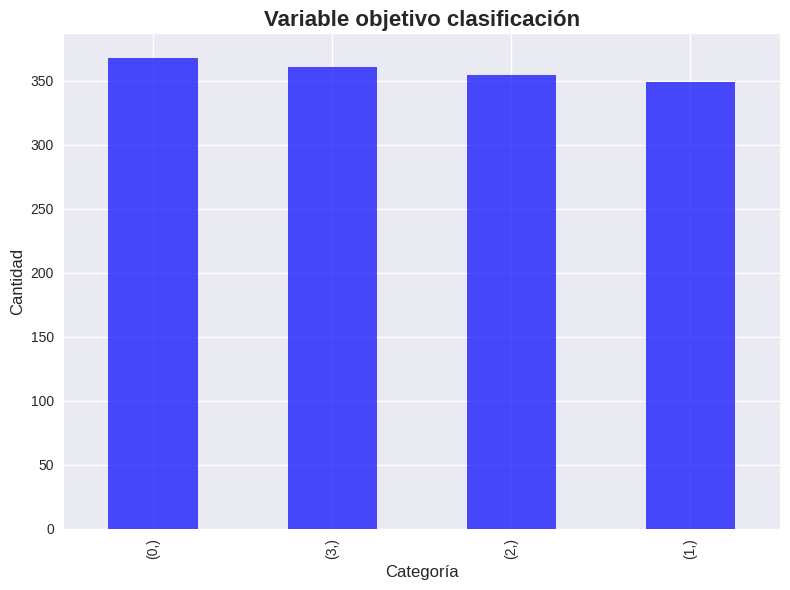

In [278]:
# Contar la cantidad de cada categoría en la columna "categoria"
conteo_categorias = y_train.value_counts()
# Configurar el estilo y tamaño del gráfico
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
# Generar el gráfico de barras
conteo_categorias.plot(kind='bar', color='blue', alpha=0.7)
# Configurar el título y etiquetas del gráfico
plt.title('Variable objetivo clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##6 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
#Parametros elegidos
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'criterion': ['entropy'],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['auto'],
    'bootstrap': [False]
}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mean CV ROC AUC: 0.9704885070715672


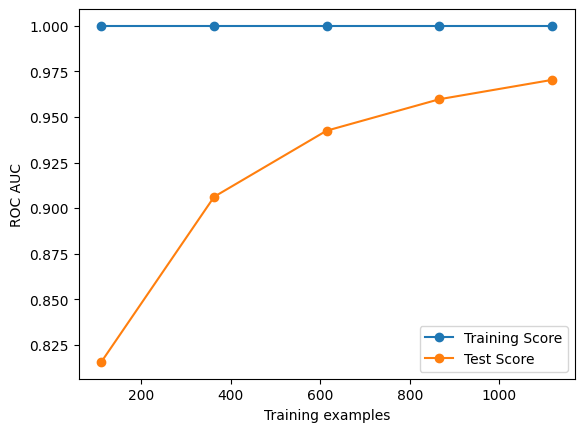

<ipython-input-47-58eecc4c9ce0>:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#Entrenamiento del modelo
model, accuracy, roc_auc, conf_matrix, best_params=train_and_evaluate_model(X_train, X_test, y_train, y_test, 'random_forest', param_grid, random_state=13)


In [ ]:
importance = model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para visualizar las características más importantes
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
feature_importance_df


,Feature,Importance
1496,Componente_Principal_1140,0.042186
1494,Componente_Principal_1137,0.007898
1497,Componente_Principal_1141,0.007686
1085,OT_Porcentaje_avaluo_catastral_urbano,0.006845
1084,OT_Porcentaje_avaluo_catastral_rural,0.006351
...,...,...
554,Ambiente_porcentaje_area_total_ecosistemas,0.000000
553,Ambiente_porcentaje_area_sinap,0.000000
552,Ambiente_porcentaje_area_seco,0.000000
1035,Justicia_otros_area_derecho_no_definida,0.000000


In [ ]:
resultado_evaluacion,conf_matrix  = evaluate_model(model, X_val, y_val)
resultado_evaluacion

,Accuracy,ROC_AUC
0,0.588235,0.782669


In [ ]:
conf_matrix

array([[  3,   1,  34,   1],
       [  0,  18,  32,   1],
       [  1,   9, 102,   1],
       [  3,   1,   7,   7]])

##7 Resultados del modelo XG_BOOST

In [ ]:
#Parametos porbados
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]}

In [227]:
#Parametros elegidos
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [7],
    'min_child_weight': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'gamma': [0.1],
    'reg_alpha': [0],
    'reg_lambda': [1]}

Mean CV ROC AUC: 0.979152741397683


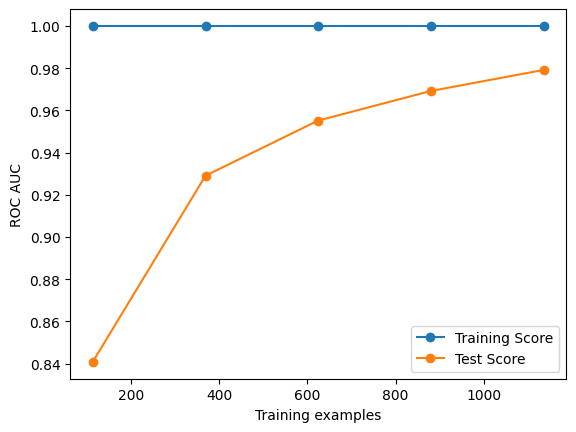

In [225]:
#Entrenamiento del modelo
model, accuracy, roc_auc, conf_matrix, best_params=train_and_evaluate_model(X_train, X_test, y_train, y_test, 'xgboost', param_grid, random_state=13)



In [233]:
resultado_evaluacion,conf_matrix  = evaluate_model(model, X_val, y_val)
resultado_evaluacion

,Accuracy,ROC_AUC
0,0.615385,0.818241


In [232]:
conf_matrix

array([[20,  1, 19,  5],
       [ 4, 40, 13,  0],
       [10, 24, 69,  3],
       [ 5,  0,  1,  7]])

##8 Generación de la Recomendación

In [296]:
Prediccion_Municipios=obtener_clasificacion_y_scores(model,X,Id_Municipio_Dane['Id_Municipio_Dane'])
Prediccion_Municipios=Prediccion_Municipios.merge(Id_Municipio_Dane, left_index=True, right_index=True)
Prediccion_Municipios

,ID,y,Score_0,Score_1,Score_2,Score_3,Id_Municipio_Dane,recomendacion,Y_Objetivo
0,5001,2,0.004794,0.002492,0.992076,0.000639,5001,Media,2
1,5002,2,0.001294,0.033988,0.964394,0.000325,5002,Media,2
2,5004,2,0.003939,0.018654,0.975592,0.001816,5004,Media,2
3,5021,2,0.264146,0.006673,0.718947,0.010234,5021,Media,2
4,5030,2,0.010996,0.001220,0.982140,0.005643,5030,Media,2
...,...,...,...,...,...,...,...,...,...
1097,97666,3,0.004765,0.001970,0.001265,0.992001,97666,Muy alta,3
1098,99001,3,0.027786,0.000350,0.002041,0.969824,99001,Alta,0
1099,99524,3,0.001475,0.000472,0.001335,0.996719,99524,Muy alta,3
1100,99624,3,0.003734,0.000805,0.001578,0.993884,99624,Muy alta,3


In [297]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Output_Final_casificacion.csv'
Prediccion_Municipios.to_csv(ruta_archivo, index=False)